In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

### Q 1-3 Using the 'diamonds' dataset - sns.load_dataset('diamonds')

In [13]:
# Loading the diamond dataset from seaborn
diamond = sns.load_dataset('diamonds')
diamond.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

##### 1.Create a violinplot of 'price' grouped by 'cut'.

<Axes: xlabel='cut', ylabel='price'>

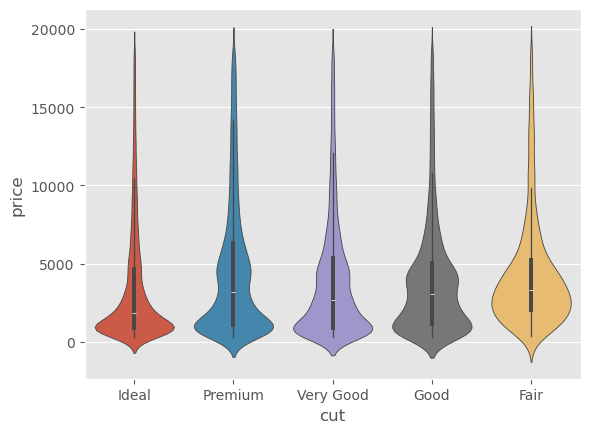

In [15]:
# Answer 1
sns.violinplot(data = diamond , x = 'cut', y = 'price',hue = 'cut')

##### 2.Create regplot on carat vs price. and give hue on 'cut'.

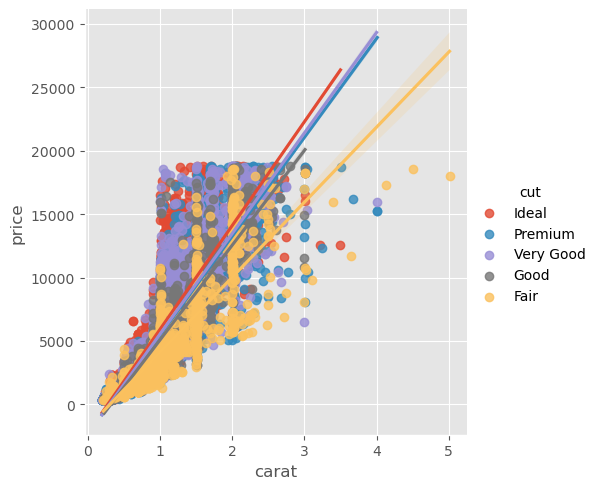

In [16]:
# Answer 2 -->> NOTE : regplot doesn't support hue parameter but lmplot is mostly similar to it and support hue parameter 
# So use lmplot instead of regplot.
sns.lmplot(data = diamond , x = 'carat' , y = 'price', hue = 'cut')

##### 3.Create boxplot on 'color' and 'price'

<Axes: xlabel='color', ylabel='price'>

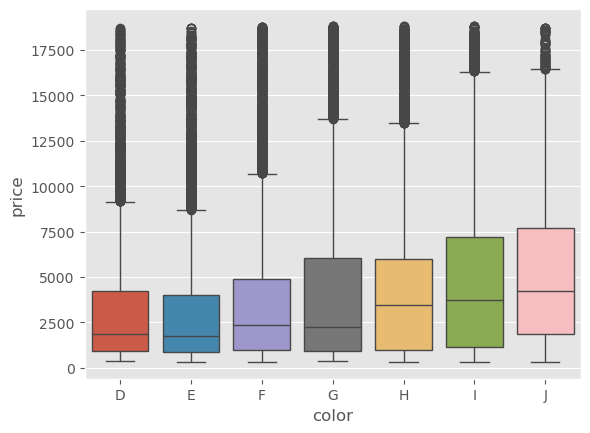

In [18]:
sns.boxplot(data = diamond, x = 'color', y = 'price', hue = 'color')

### Q:4 Using the 'Taxis' dataset - sns.load_dataset('taxis')

In [20]:
taxis = sns.load_dataset('taxis')
taxis.head()

pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      Manhattan       Manhattan  
2           West Village      Manhattan       Manhattan  
3         Yorkville West      Manhattan       Manhattan  
4         Yorkville West      Manhattan       Manhattan

##### 4.1. Create a categorical estimate plot of the totl fare - 'total' for each payment type - 'payment'.

<Axes: xlabel='payment', ylabel='total'>

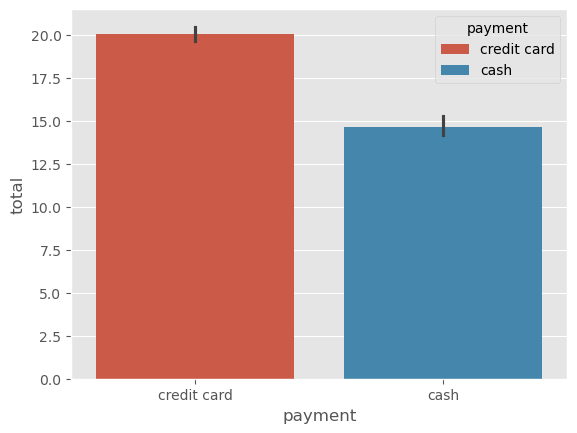

In [26]:
# Since there are three categorical estimate plot -->> BarPlot,Pointplot and Countplot so use any one but can't use count
# plot coz it's a univariate analysis and also point plot is used when we want any mean values but you can use it 
sns.barplot(data = taxis , x = 'payment', y = 'total', hue = 'payment')

<Axes: xlabel='payment', ylabel='total'>

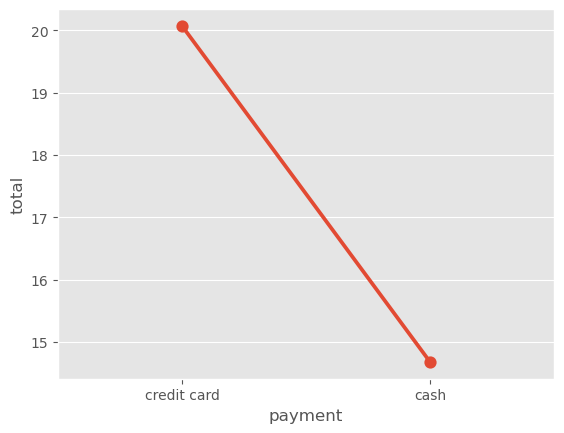

In [27]:
# Or you can use pointplot
sns.pointplot(data = taxis , x = 'payment', y = 'total', errorbar = None)

##### 4.2. Create a regression plot on time of ride vs total fare. You will need to calculate ride time using pickup and dropoff column.

In [42]:
# Adding new column ride
taxis['ride'] = taxis['dropoff'] - taxis['pickup']
taxis.head()

pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough            ride  
0    UN/Turtle Bay South      Manhattan       Manhattan 0 days 00:06:15  
1  Upper West Side South      Manhattan       Manhattan 0 days 00:07:05  
2           West Village      Manhattan       Manhattan 0 days 00:07:24  
3         Yorkville West      Manhattan       Manhattan 0 days 00:25:52  
4         Yorkville West      Manhattan       Manhattan 0 days 00:09:32

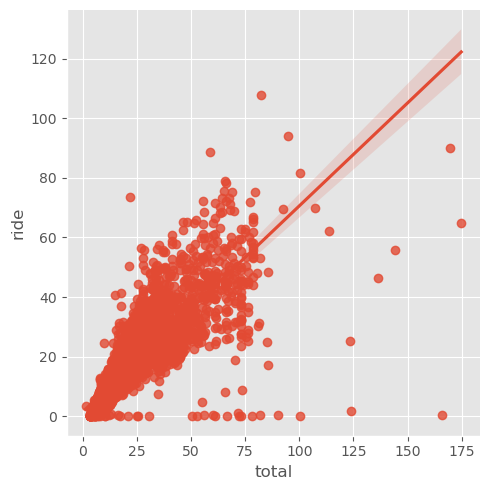

In [44]:
# Plotting a regplot
# Also note : datatype of ride is a timedelta and total fare is float so change ride into float otherwise gives an error
# Plotting a regplot
taxis['ride'] = (taxis['dropoff'] - taxis['pickup']).dt.total_seconds() / 60 # Converted into float
sns.lmplot(data = taxis , x = 'total', y = 'ride')

##### 4.3 Give hue on payment type. and Another plot hue on taxi 'color'. Observe the plot.

<Axes: xlabel='distance', ylabel='total'>

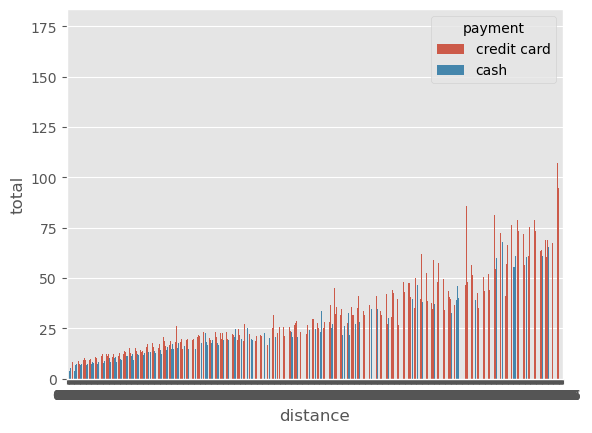

In [46]:
sns.barplot(data = taxis , x = 'distance' , y = 'total' , hue = 'payment', errorbar = None)

<Axes: xlabel='total', ylabel='ride'>

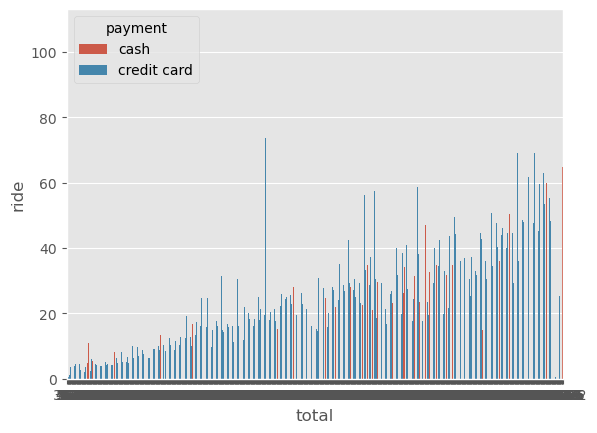

In [47]:
sns.barplot(data = taxis , x = 'total' , y = 'ride' , hue = 'payment', errorbar = None)

### Problem 5-12:

In [50]:
df = pd.read_csv(r"C:\Users\deepu\OneDrive\Desktop\Python\insurance dataset.csv")
df.head()

index  PatientID   age gender   bmi  bloodpressure diabetic  children  \
0      0          1  39.0   male  23.2             91      Yes         0   
1      1          2  24.0   male  30.1             87       No         0   
2      2          3   NaN   male  33.3             82      Yes         0   
3      3          4   NaN   male  33.7             80       No         0   
4      4          5   NaN   male  34.1            100       No         0   

  smoker     region    claim  
0     No  southeast  1121.87  
1     No  southeast  1131.51  
2     No  southeast  1135.94  
3     No  northwest  1136.40  
4     No  northwest  1137.01

##### Problem 5: Draw a strip plot and swarm plot between "gender" and "bloodpressure" w.r.t "smoker" (use as hue parameter). Also add title to the charts.

Text(0.5, 1.0, 'Strip Plot: Blood Pressure vs Gender (by Smoker)')

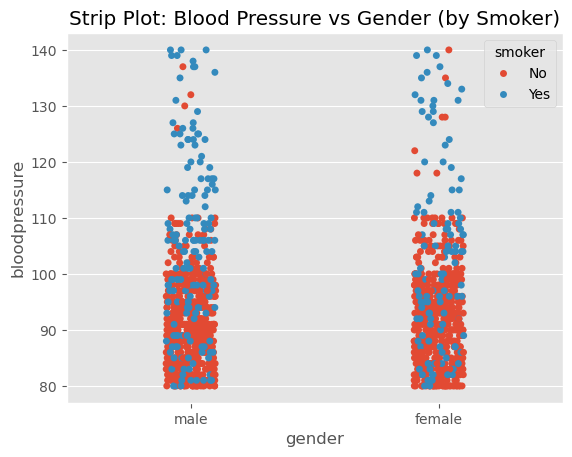

In [59]:
sns.stripplot(data = df , x = 'gender' , y = 'bloodpressure', hue = 'smoker')
plt.title("Strip Plot: Blood Pressure vs Gender (by Smoker)")
# Or you can use xy = set_title() if you don't want to use matplotlib

Text(0.5, 1.0, 'Strip Plot: Blood Pressure vs Gender (by Smoker)')

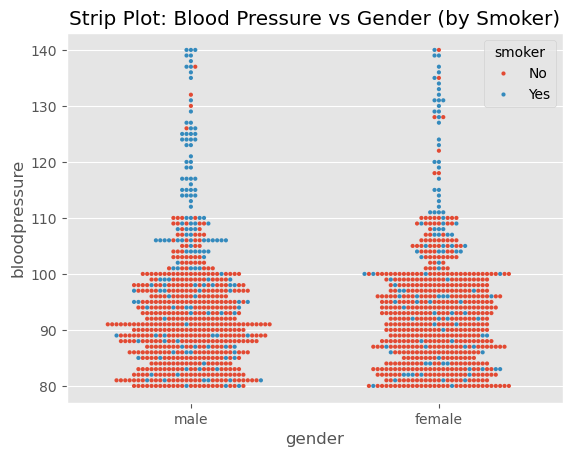

In [60]:
sns.swarmplot(data = df , x = 'gender' , y = 'bloodpressure', hue = 'smoker', size = 3)
plt.title("Strip Plot: Blood Pressure vs Gender (by Smoker)")

##### Problem 6: Draw a Box-plot and a Violin plot of which x-axis represents the "region" and the y-axis represents the "bmi". Also add extra information of the column "diabetic".

<Axes: xlabel='region', ylabel='bmi'>

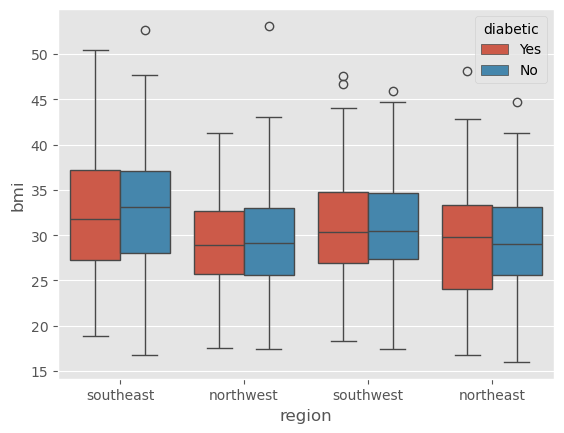

In [61]:
sns.boxplot(data = df , x = 'region' , y = 'bmi' , hue = 'diabetic')

<Axes: xlabel='region', ylabel='bmi'>

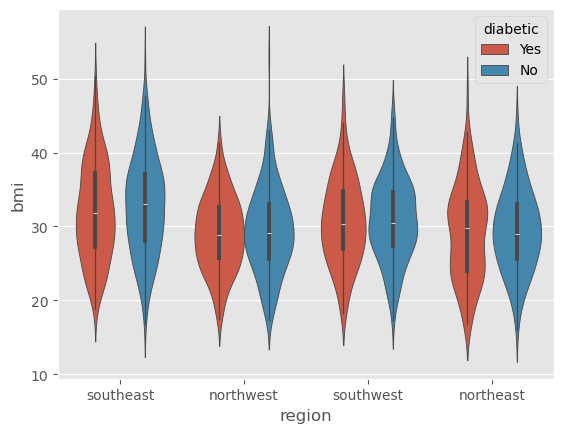

In [62]:
sns.violinplot(data = df , x = 'region' , y = 'bmi' , hue = 'diabetic')

##### Problem 7: Draw a bar plot and point plot of which x-axis represents the "gender" and y-axis represents "claim". Also add extra information about "smoker" column.

<Axes: xlabel='gender', ylabel='claim'>

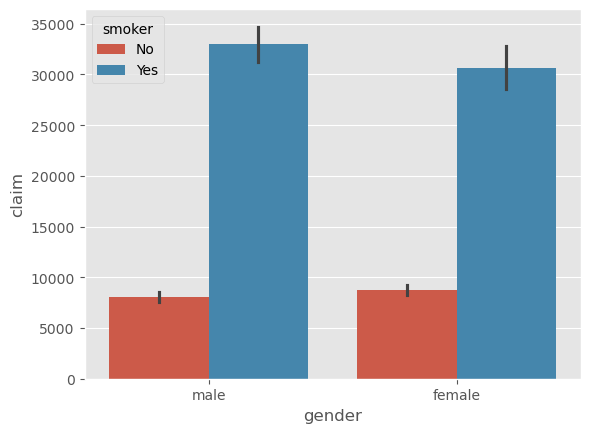

In [63]:
sns.barplot(data = df , x = 'gender' , y = 'claim' , hue = 'smoker')

<Axes: xlabel='gender', ylabel='claim'>

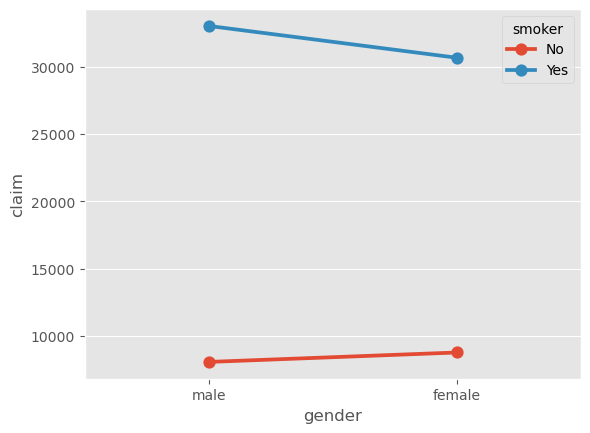

In [65]:
sns.pointplot(data = df , x = 'gender' , y = 'claim' , hue = 'smoker', errorbar = None)

##### Problem 8: Draw a reg plot between "age" and "bmi" columns.

<Axes: xlabel='age', ylabel='bmi'>

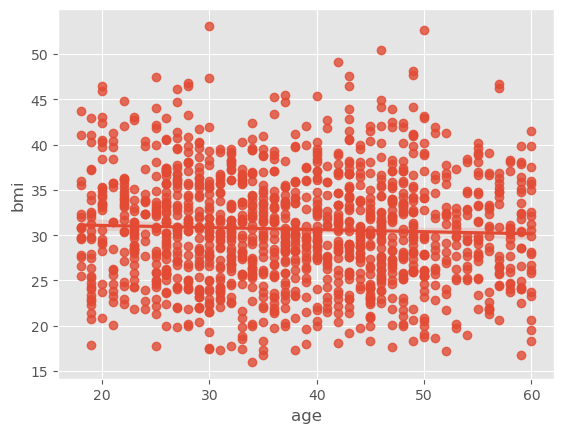

In [66]:
sns.regplot(data = df , x = 'age' , y = 'bmi')

##### Problem 9: Draw a pair plot of the insurance data. Use "gender" as hue parameter.

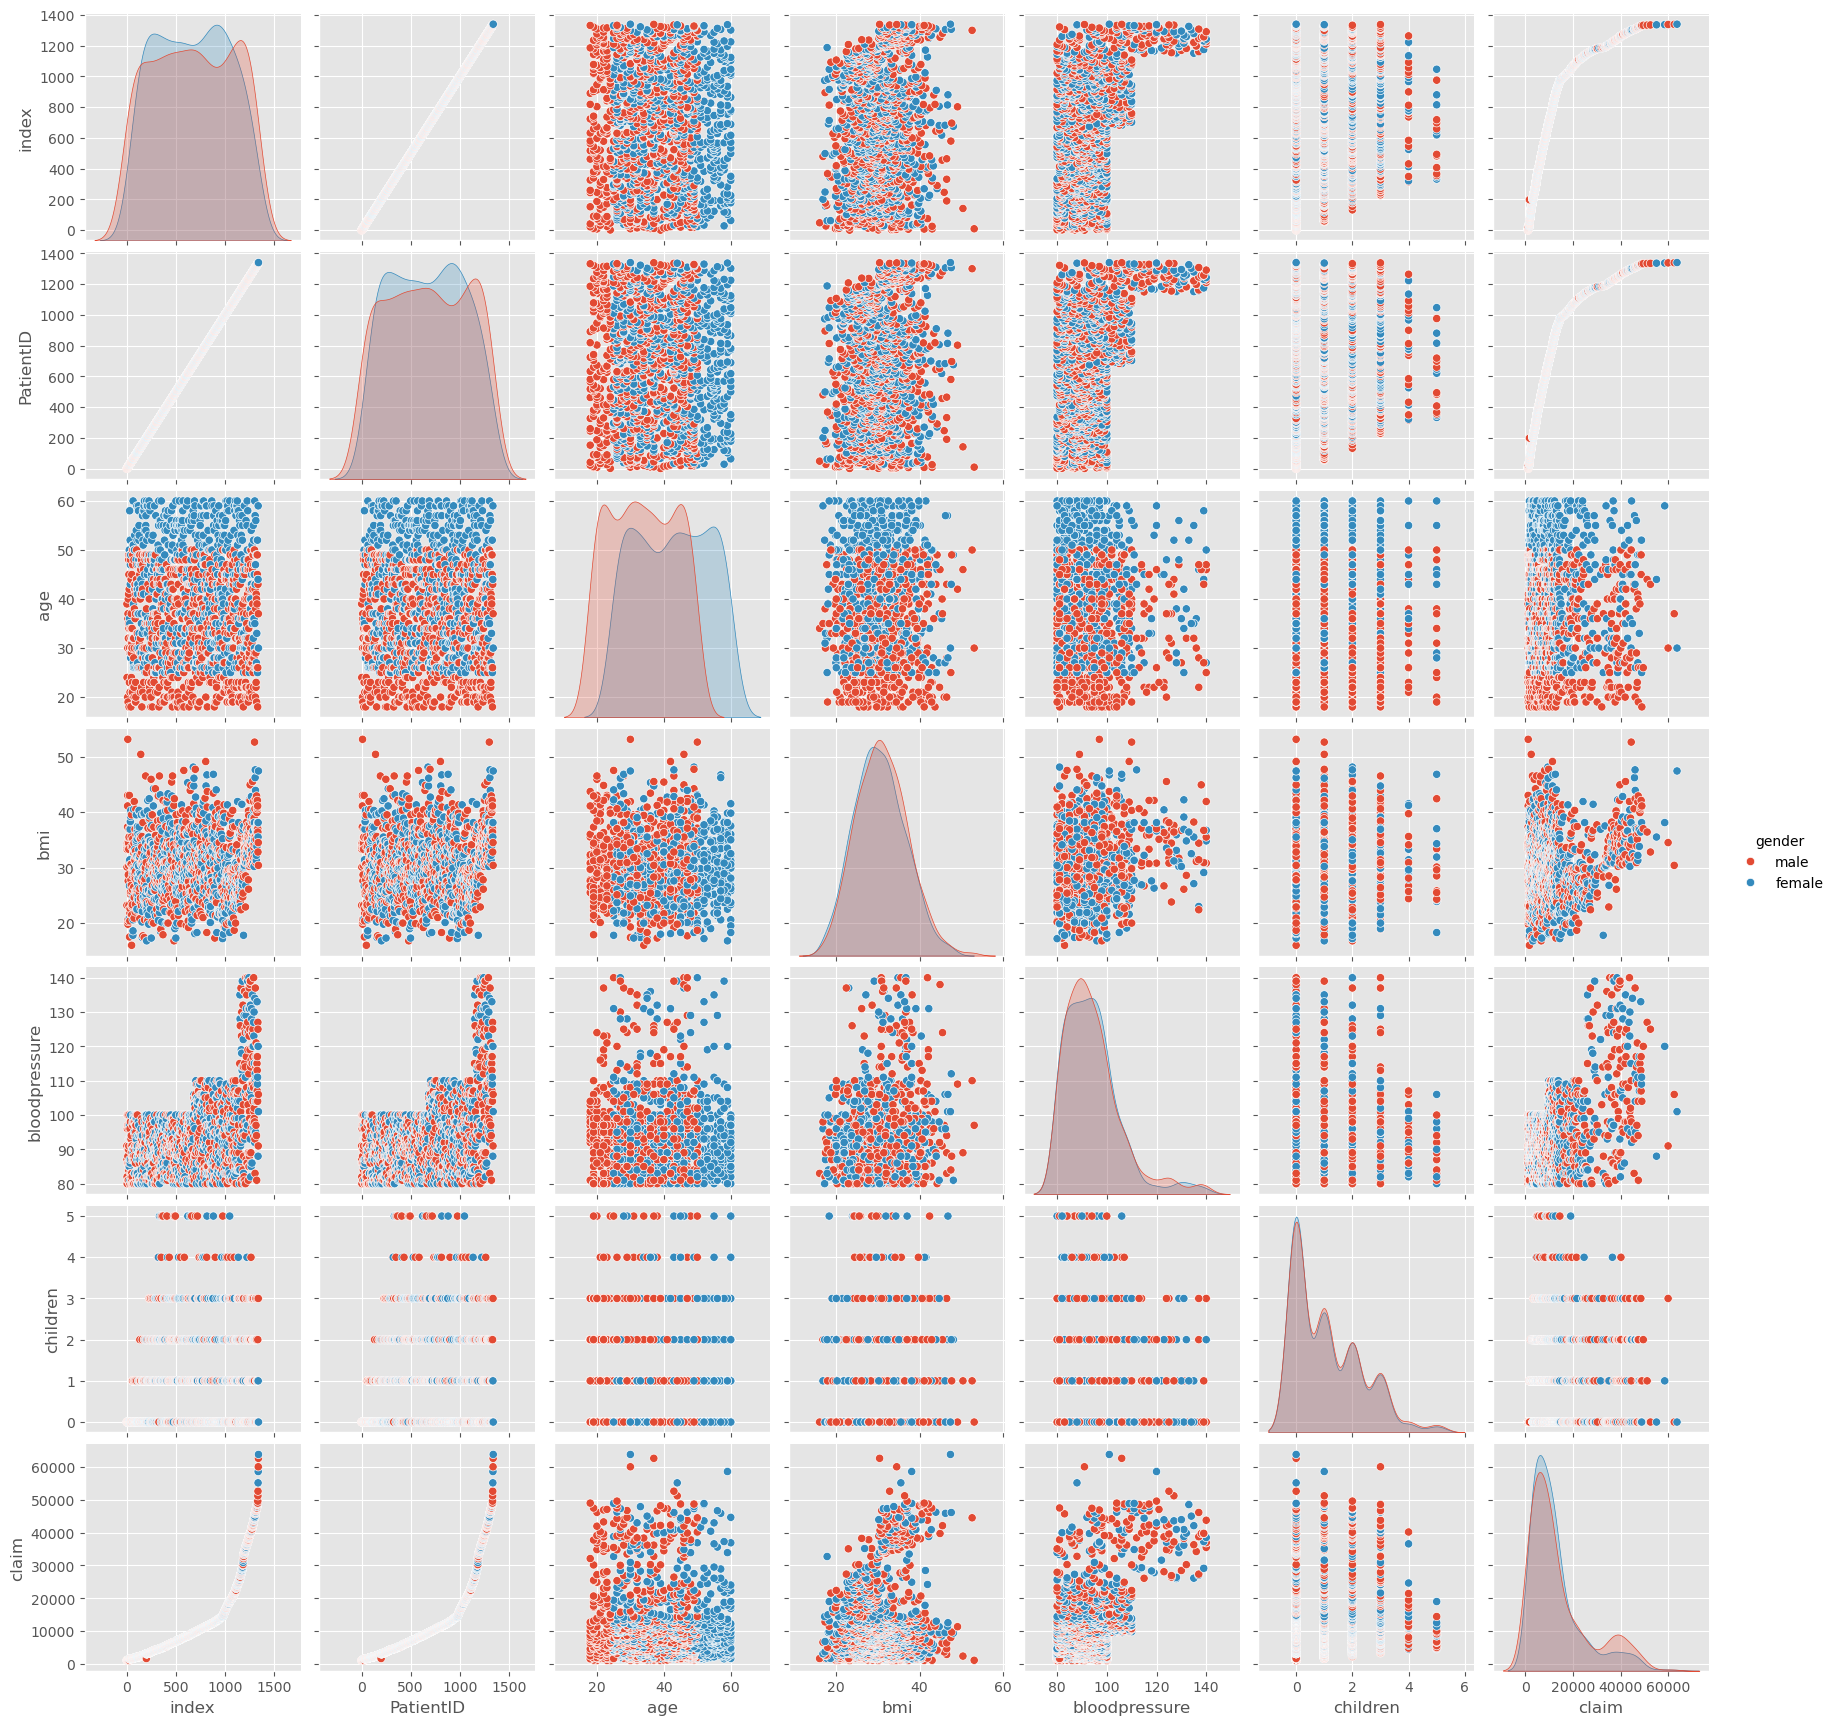

In [68]:
sns.pairplot(df,hue = 'gender')

##### Problem 10: Draw a pair grid of the insurance data and use "diabetic" column as a hue parameter. Also, make the diagonal plots as box-plot, upper parts as scatter plot and the lower parts as kde plot.

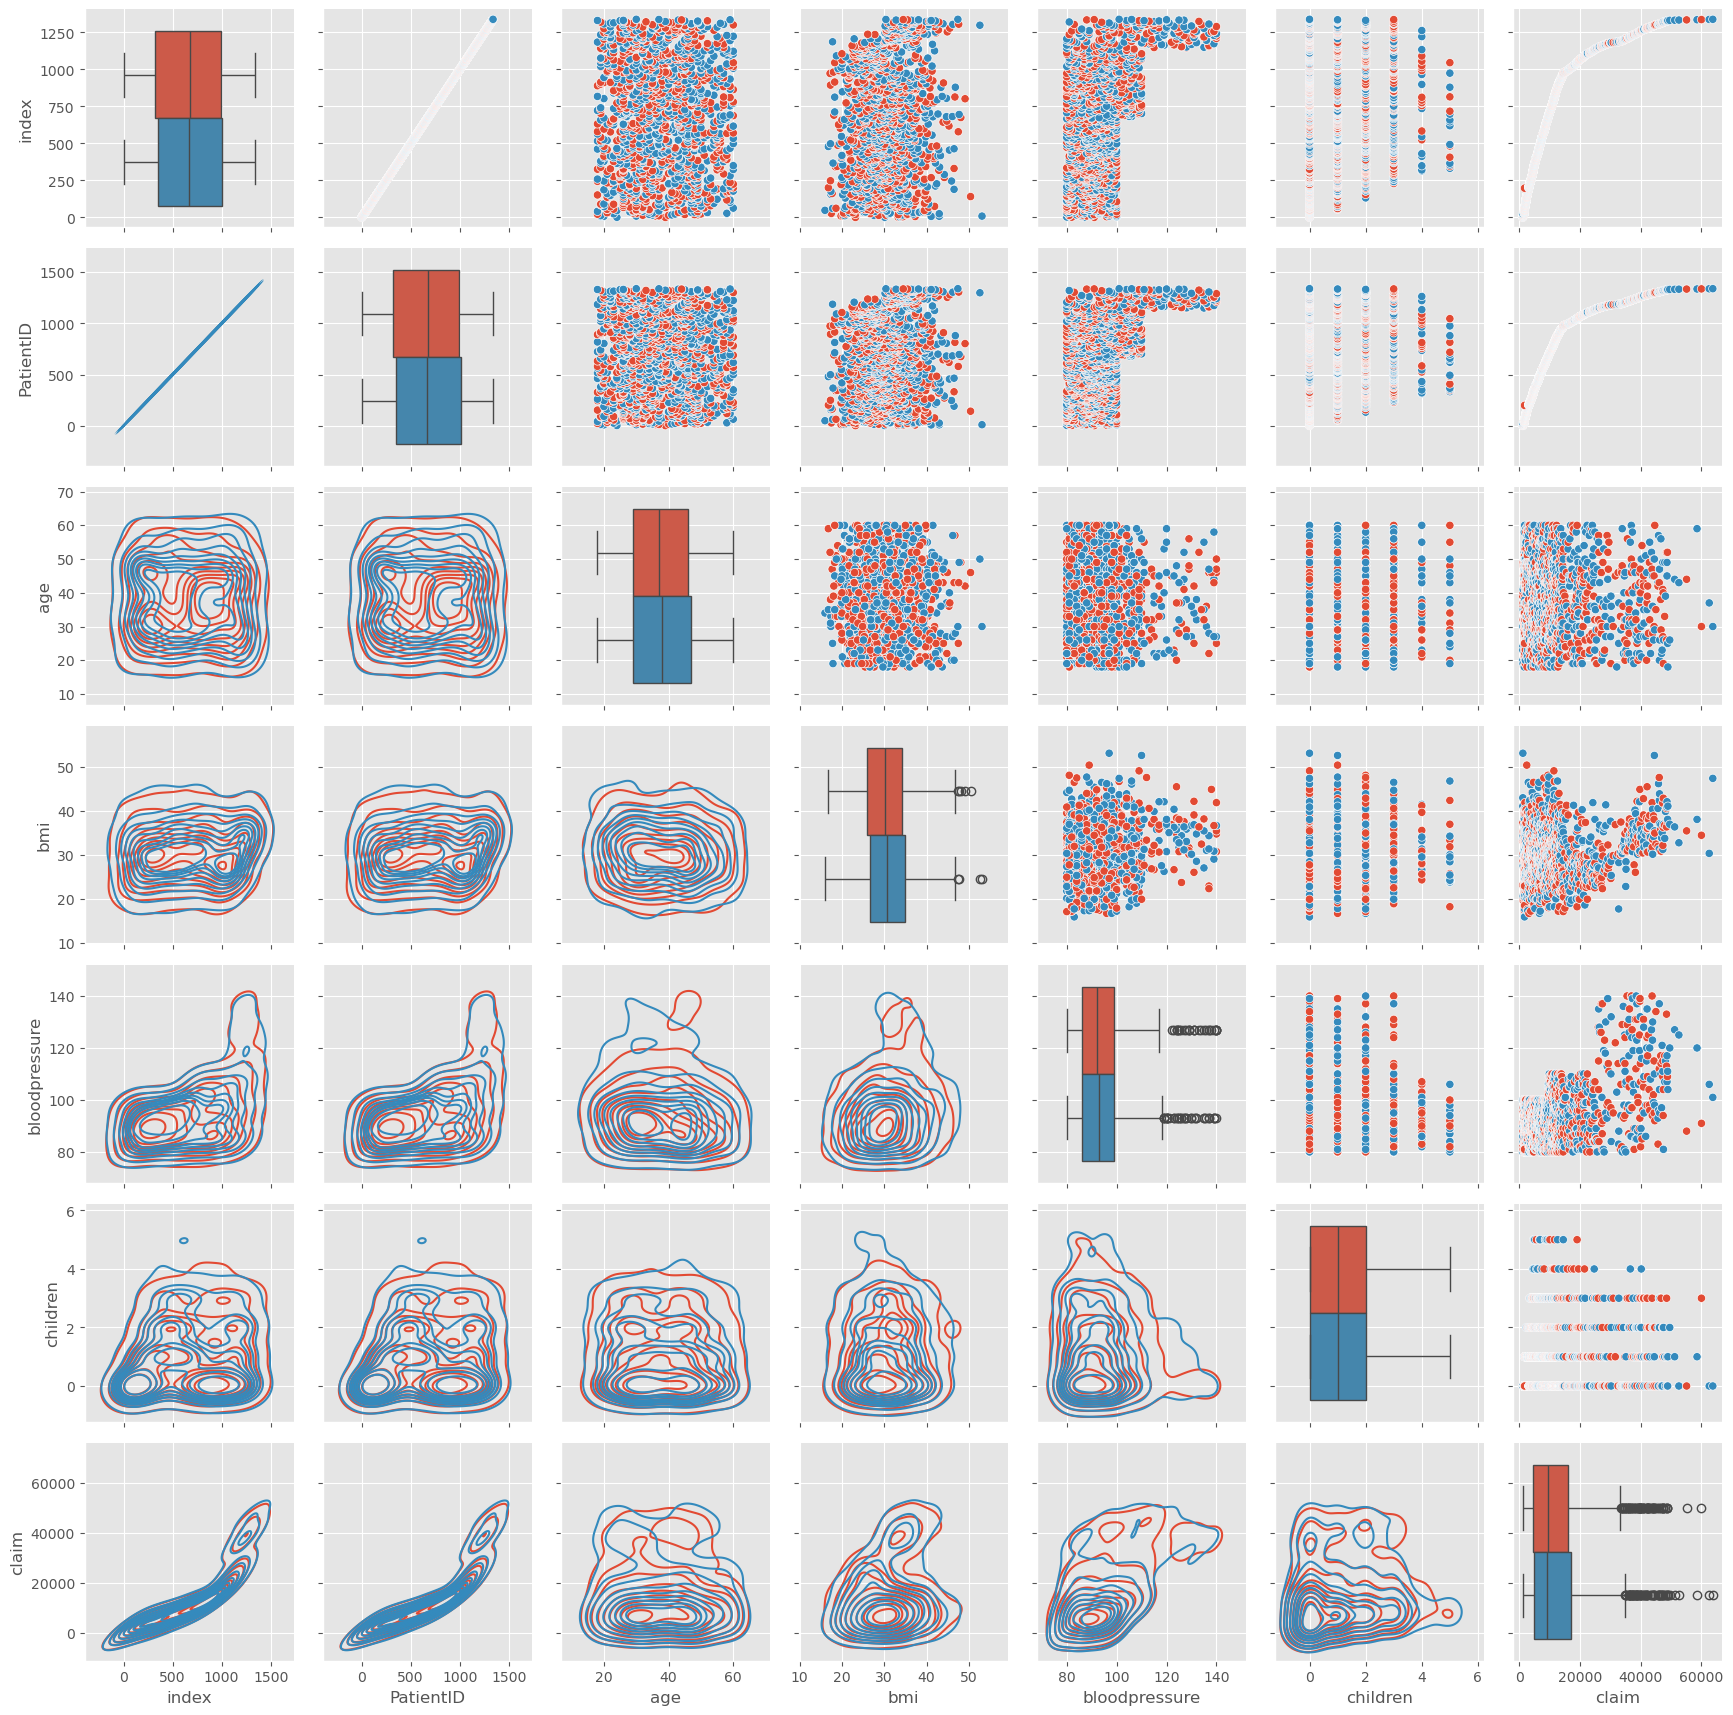

In [69]:
g = sns.PairGrid(data = df, hue = 'diabetic')
g.map_diag(sns.boxplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

##### Prolem 11: Draw a joint plot as scatter between "bloodpressure" and "bmi". Use "smoker" as hue parameter.

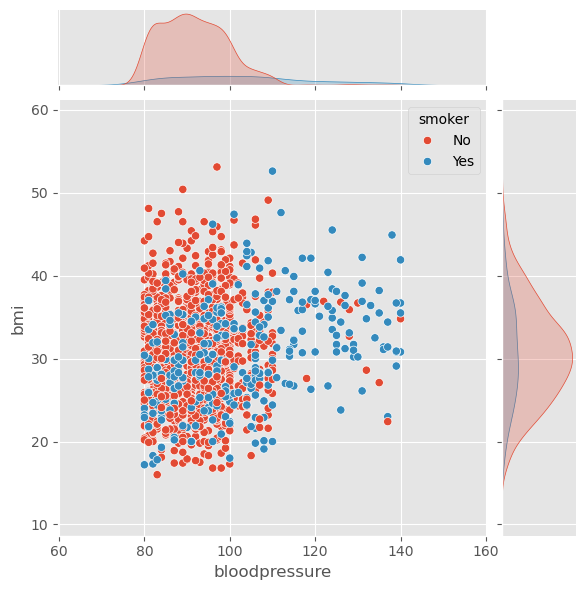

In [70]:
sns.jointplot(data = df , x = 'bloodpressure', y = 'bmi', hue = 'smoker' , kind = 'scatter')

##### Problem 12: Draw a joint grid of which x-axis represents "age" and y-axis represents "claim". Draw

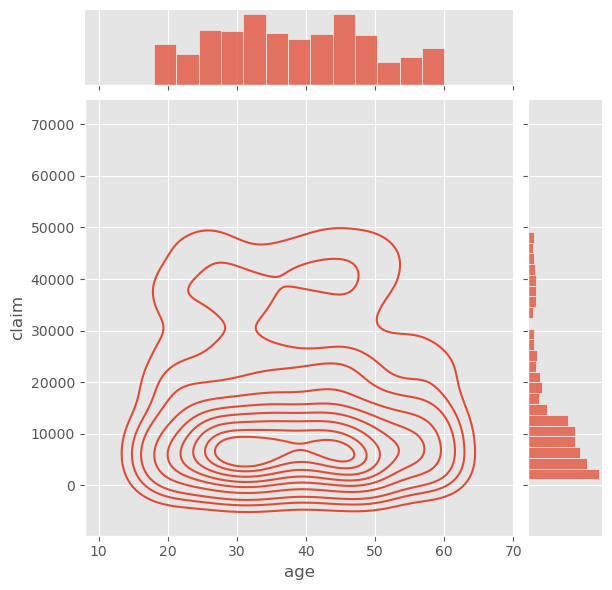

In [73]:
g = sns.JointGrid(data = df , x = 'age' , y = 'claim')
g.plot(sns.kdeplot, sns.histplot)